<a href="https://colab.research.google.com/github/FaithKare/KNN-and-Naive-bayes-Classification-/blob/master/Faith_Wangari_week9_IP_K_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the question 

## a) Specyfing the question for analysis 

The main objective of the analysis is to create  models with the K-Nearest Neighbor classifier using different train test split sizes that can predict if a passenger survived a sinking ship or not.

## b) Defining metric of success

identify the score in percentage of passengers that are correctly predicted, known as accuracy before and after optimization of the best model.

## c) Understanding the context 

The titanic was one of the largest boats in England however it hit a rock and the ship sunk. This led to many deaths as not everyone was bale to make it to safety. We would like to take this opportunity to predict whether someone would survive given certain variables such as gender , class and where they boarded from.

## d) Recording the experimental design 

Below are the steps that will be conducted in this analysis in order to fulfill the project goal satisfactorily:

*   Data Reading and Cleaning 

*   Exploratory Data Analysis 
> Univariate analysis , Bivariate analysis, Multivariate analysis

*   Implementing the solution with the K-NN algorithm 
> First model (80-20) sets , 
> Second model (70-30) sets , 
> Third mode (60-40) sets , 

*   Optimizing the best model 


## e) Data Relevance

This was measured against the success of the metrics after analysis was done.

# 2. Loading and checking the data 

In [ ]:
# importing relevant libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## 2a) Checking the train Dataset

In [ ]:
# the train dataset 
df1 = pd.read_csv("train (5).csv")

In [ ]:
# the test dataset
df2 = pd.read_csv("test (1).csv")


In [ ]:
# preview of the train dataset which we wil focus on since it has the label data 
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# preview of the bottom of the dataset 
df1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# checking the number of records in the dataset
df1.shape

(891, 12)

In [ ]:
#checking if each column has the right dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 2b) Checking the test dataset

In [ ]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df2.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
df2.shape

(418, 11)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# 3. Data Cleaning 

## 3a) Cleaning the Train dataset

In [ ]:
# drop columns not needed in the analysis 
df1 = df1.drop(['PassengerId','Name','Ticket','Cabin'], 1)
df1.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# checking for missing values 
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

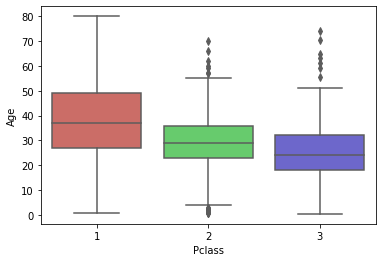

In [ ]:
# Let's look at how passenger age is related to their class as a passenger on the boat.

sns.boxplot(x='Pclass', y='Age', data= df1, palette='hls')

In [ ]:
# Speaking roughly, we could say that the younger a passenger is, the more likely it is for them to be in 3rd class. 
# The older a passenger is, the more likely it is for them to be in 1st class. 
# So there is a loose relationship between these variables. 
# So, let's write a function that approximates a passengers age, based on their class. 
# From the box plot, it looks like the average age of 1st class passengers 
# is about 37, 2nd class passengers is 29, and 3rd class pasengers is 24.

# So let's write a function that finds each null value in the Age variable, and for each null, 
# checks the value of the Pclass and assigns an age value according to the average age of passengers in that class.
#
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

# When we apply the function and check again for null values, we see that there are no more null values in the age variable.
#
df1['Age'] = df1[['Age', 'Pclass']].apply(age_approx, axis=1)
        

In [ ]:
# dropping the missing values in the embarked column sice they are only two 
df1.dropna(inplace=True)

# confirming all missing values have been dealt with  
df1.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [ ]:
# checking for duplicates in the data 
df1.duplicated().sum()

116

In [ ]:
# Removing duplicates
# Keeping every first data point of the duplicated datapoints
df1.drop_duplicates(keep='first', inplace = True)

# Checking to confirm whether duplicates have been dropped
df1.duplicated().any()

False

In [ ]:
# checking for anomalies in the dataset 
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3- Q1
IQR

Survived     1.000
Pclass       2.000
Age         16.000
SibSp        1.000
Parch        1.000
Fare        26.325
dtype: float64

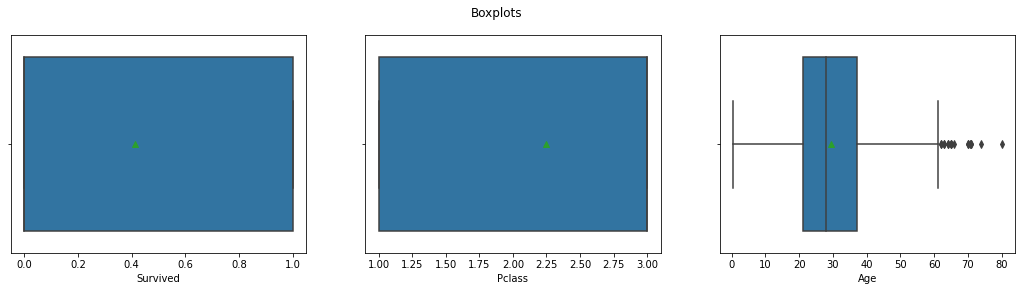

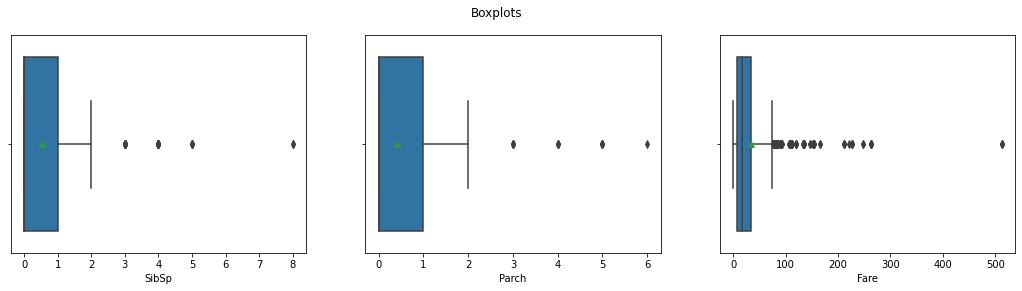

In [ ]:
# plotting outliers in the dataset using boxplots 
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,4))
fig.suptitle('Boxplots')
sns.boxplot(x = df1['Survived'], ax=ax1, showmeans = True)
sns.boxplot(x = df1['Pclass'], ax=ax2, showmeans = True)
sns.boxplot(x = df1['Age'], ax=ax3, showmeans = True)

fig, (ax4, ax5,ax6) = plt.subplots(1,3, figsize=(18,4))
fig.suptitle('Boxplots')
sns.boxplot(x = df1['SibSp'], ax=ax4, showmeans = True)
sns.boxplot(x = df1['Parch'], ax=ax5, showmeans = True)
sns.boxplot(x = df1['Fare'], ax=ax6, showmeans = True)

# these outliers will not be removed in the analysis 

## 3b) Cleaning the Test dataset

In [ ]:
# drop columns not needed in the analysis 
df2 = df2.drop(['PassengerId','Name','Ticket','Cabin'], 1)
df2.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [ ]:
# checking for missing values 
df2.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

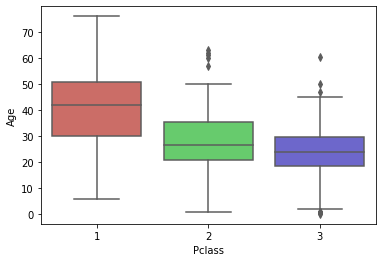

In [ ]:
# Let's look at how passenger age is related to their class as a passenger on the boat.

sns.boxplot(x='Pclass', y='Age', data= df2, palette='hls')

In [ ]:
# So let's write a function that finds each null value in the Age variable, and for each null, 
# checks the value of the Pclass and assigns an age value according to the average age of passengers in that class.
#
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 28
        else:
            return 24
    else:
        return Age

# When we apply the function and check again for null values, we see that there are no more null values in the age variable.
#
df2['Age'] = df2[['Age', 'Pclass']].apply(age_approx, axis=1)

In [ ]:
# dropping the missing values in the fare column since it is only one  
df2.dropna(inplace=True)

# confirming all missing values have been dealt with  
df2.isnull().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [ ]:
# checking for duplicates in the test data 
df2.duplicated().sum()

43

In [ ]:
# Removing duplicates
# Keeping every first data point of the duplicated datapoints
df2.drop_duplicates(keep='first', inplace = True)

# Checking to confirm whether duplicates have been dropped
df2.duplicated().any()

False

In [ ]:
# checking for anomalies in the test dataset 
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3- Q1
IQR

Pclass     2.0000
Age       16.3750
SibSp      1.0000
Parch      0.7500
Fare      30.5448
dtype: float64

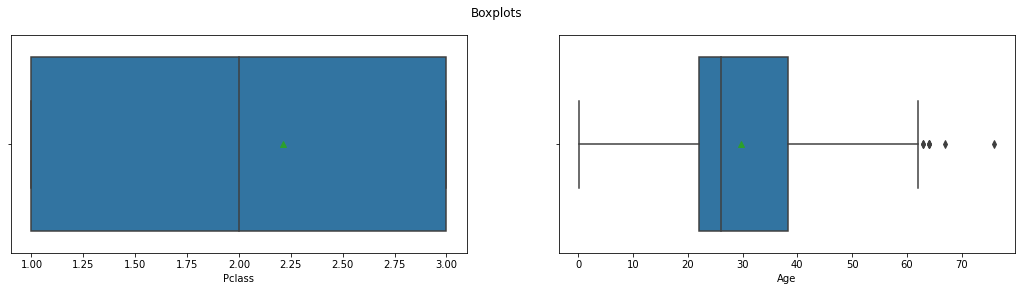

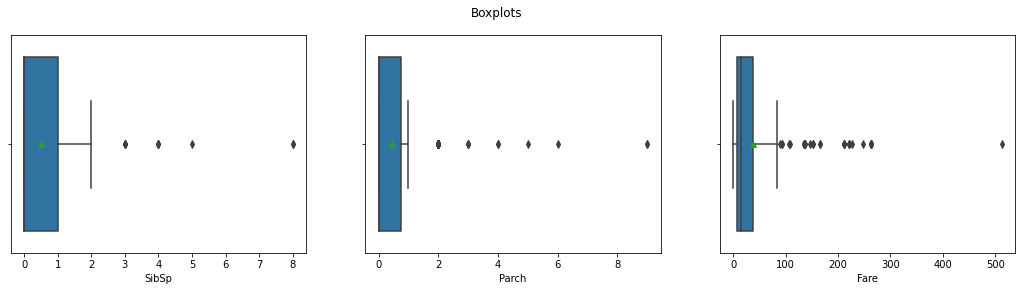

In [ ]:
# plotting outliers in the test dataset using boxplots 
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,4))
fig.suptitle('Boxplots')
sns.boxplot(x = df2['Pclass'], ax=ax1, showmeans = True)
sns.boxplot(x = df2['Age'], ax=ax2, showmeans = True)

fig, (ax3, ax4,ax5) = plt.subplots(1,3, figsize=(18,4))
fig.suptitle('Boxplots')
sns.boxplot(x = df2['SibSp'], ax=ax3, showmeans = True)
sns.boxplot(x = df2['Parch'], ax=ax4, showmeans = True)
sns.boxplot(x = df2['Fare'], ax=ax5, showmeans = True)

# these outliers will not be removed in this analysis 

# 4. Exploratory Data Analysis

## 4a) EDA of the Train dataset

### i) Univariate Analysis 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


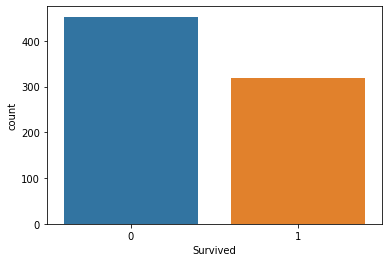

In [ ]:
# countplot of the passengers survived
sns.countplot(df1['Survived'])

# the countplot shows more passengers did not survive (0)

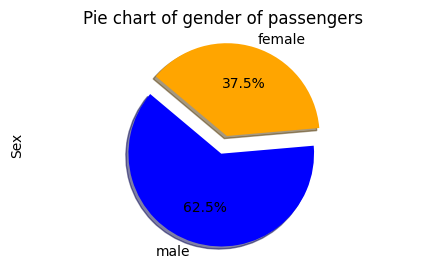

In [ ]:
# Pie Chart for sex of passengers in the train dataset
sex = df1.Sex.value_counts()
plt.figure(figsize= (5,3), dpi=100)

# Highlighting yes
explode = (0.2, 0)  
colors = ['blue', 'orange']

# Plotting our pie chart
sex.plot.pie(explode = explode, colors = colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Pie chart of gender of passengers')
plt.show()

# the data has more male passengers than females 

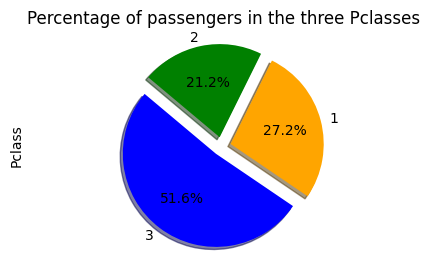

In [ ]:
# Pie Chart of passengers in different classes 
pclass = df1.Pclass.value_counts()
plt.figure(figsize= (5,3), dpi=100)

# Highlighting yes
explode = (0.1,0.1, 0.1)  
colors = ['blue', 'orange','green']

# Plotting our pie chart
pclass.plot.pie(explode = explode, colors = colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage of passengers in the three Pclasses')
plt.show()

# there are more passengers in the third class followed by the first class then finally the second class  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


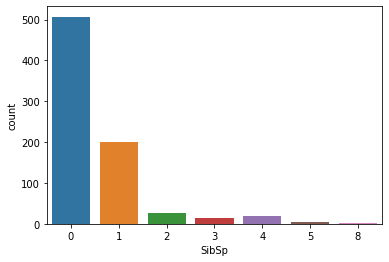

In [ ]:
# countplot of the column SIBSP 
sns.countplot(df1['SibSp'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


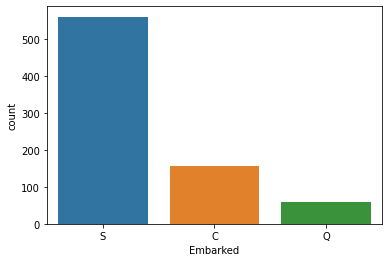

In [ ]:
# countplot of the column embarked 
sns.countplot(df1['Embarked'])

Text(0.5, 0, 'age')

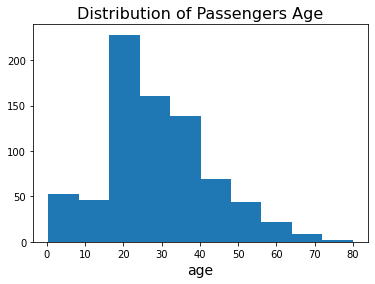

In [ ]:
# distribution of age of the passengers in the train dataset 
plt.hist(df1['Age'])
plt.title("Distribution of Passengers Age", fontsize = 16)
plt.xlabel("age", fontsize = 14 )

In [ ]:
#getting the measures of dispersion
# Checking on coefficent of variance, skewness and kurtosis on age  variable 

print('The skewness is:', df1['Age'].skew())
print('The kurtosis is:', df1['Age'].kurt())
print('The coefficient of variation is:', df1['Age'].std()/df1['Age'].mean())
print('prices Quantiles:', df1["Age"].quantile([0.25, 0.5, 0.75]))

The skewness is: 0.4271320765509538
The kurtosis is: 0.4265561819355077
The coefficient of variation is: 0.4703342997815702
prices Quantiles: 0.25    21.0
0.50    28.0
0.75    37.0
Name: Age, dtype: float64


In [ ]:
#getting the measures of central tendancy of age

print('Mean age of passengers:', df1["Age"].mean())
print('Mode of age:', df1["Age"].mode())
print('Median of age:', df1["Age"].median())


Mean age of passengers: 29.525769728331174
Mode of age: 0    24.0
dtype: float64
Median of age: 28.0


### ii) Bivariate Analysis 

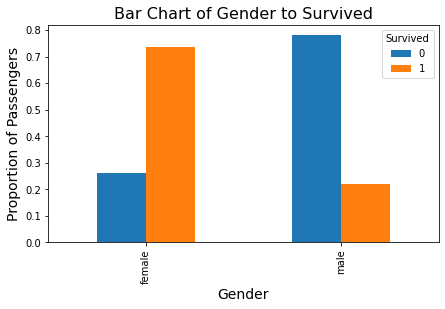

In [ ]:
# Comparison of Gender and survival 

table=pd.crosstab(df1['Sex'],df1['Survived'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',figsize = (7,4), stacked=False)
plt.title('Bar Chart of Gender to Survived', fontsize = 16)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Proportion of Passengers', fontsize = 14)
plt.show()

# there are more females that survived than males even thought the dataset has more male passengers than females 

In [ ]:
# frequency table of survived passengers vs SIBSP
pd.crosstab(index= df1['SibSp'],columns=df1["Survived"],margins=True)


Survived,0,1,All
SibSp,,,
0,313,194,507
1,93,107,200
2,15,12,27
3,10,4,14
4,15,3,18
5,5,0,5
8,2,0,2
All,453,320,773


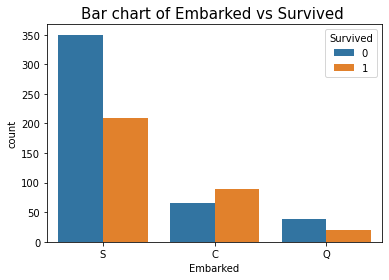

In [ ]:
# countplot of embarked vs survived comparison
#
sns.countplot(x = 'Embarked', hue = 'Survived', data = df1)
plt.title("Bar chart of Embarked vs Survived ", fontsize = 15)
plt.show()

# paasngers who embarked at point S had a higher propotion of surival than other stations 

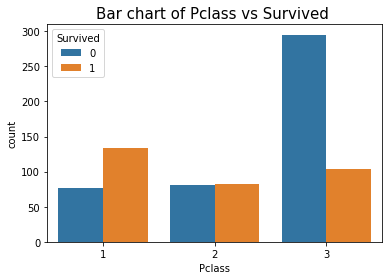

In [ ]:
# countplot of embarked vs survived comparison

sns.countplot(x = 'Pclass', hue = 'Survived', data = df1)
plt.title("Bar chart of Pclass vs Survived ", fontsize = 15)
plt.show()

# paasngers in the first class survived more than passengers in the classes  

In [ ]:
# the correlations between the variables
corr = df1.corr()
corr

# the varibales have low to moderate correlation 

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.330105,-0.073872,-0.037952,0.068862,0.242846
Pclass,-0.330105,1.000000,-0.390190,0.087234,0.040196,-0.550306
Age,-0.073872,-0.390190,1.000000,-0.285409,-0.186385,0.110178
SibSp,-0.037952,0.087234,-0.285409,1.000000,0.379745,0.134527
Parch,0.068862,0.040196,-0.186385,0.379745,1.000000,0.191163
Fare,0.242846,-0.550306,0.110178,0.134527,0.191163,1.000000


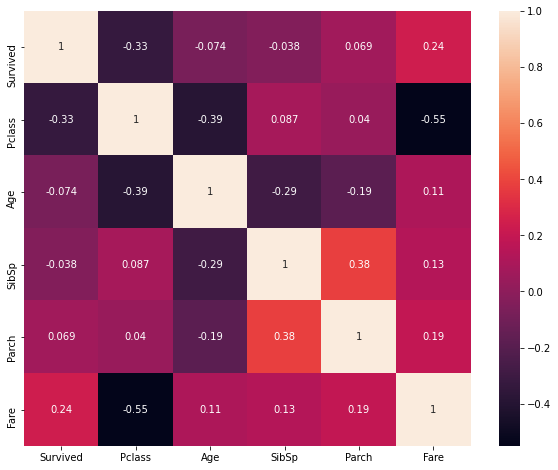

In [ ]:
# visualizing the correlation heatmap 
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot = True)
plt.show()

## 4b) EDA of the test dataset

### i) Univariate Analysis 

Text(0.5, 0, 'age')

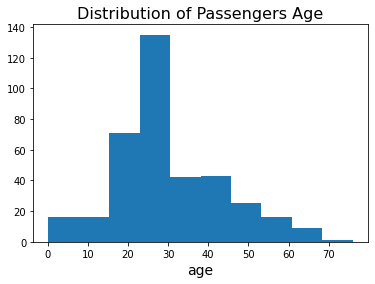

In [ ]:
# distribution of age of the passengers in the train dataset 
plt.hist(df2['Age'])
plt.title("Distribution of Passengers Age", fontsize = 16)
plt.xlabel("age", fontsize = 14 )

In [ ]:
#getting the measures of dispersion
# Checking on coefficent of variance, skewness and kurtosis on age  variable 

print('The skewness is:', df2['Age'].skew())
print('The kurtosis is:', df2['Age'].kurt())
print('The coefficient of variation is:', df2['Age'].std()/df2['Age'].mean())
print('prices Quantiles:', df2["Age"].quantile([0.25, 0.5, 0.75]))

The skewness is: 0.5606687866525017
The kurtosis is: 0.3667446789029509
The coefficient of variation is: 0.4536170787747228
prices Quantiles: 0.25    22.000
0.50    26.000
0.75    38.375
Name: Age, dtype: float64


In [ ]:
#getting the measures of central tendancy of age

print('Mean age of passengers:', df2["Age"].mean())
print('Mode of age:', df2["Age"].mode())
print('Median of age:', df2["Age"].median())


Mean age of passengers: 29.737967914438503
Mode of age: 0    24.0
dtype: float64
Median of age: 26.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


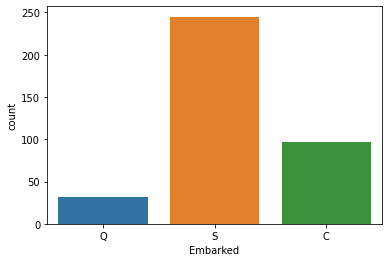

In [ ]:
# countplot of the column embarked 
sns.countplot(df2['Embarked'])

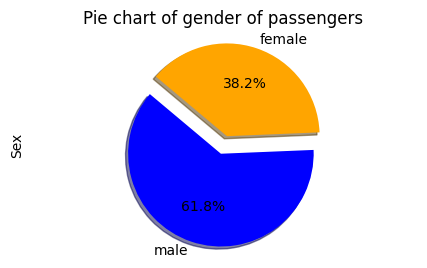

In [ ]:
# Pie Chart for sex of passengers in the test dataset
sex = df2.Sex.value_counts()
plt.figure(figsize= (5,3), dpi=100)

# Highlighting yes
explode = (0.2, 0)  
colors = ['blue', 'orange']

# Plotting our pie chart
sex.plot.pie(explode = explode, colors = colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Pie chart of gender of passengers')
plt.show()

# the data has more male passengers than females 

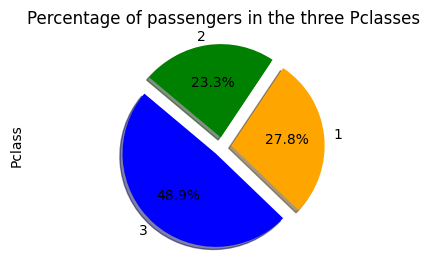

In [ ]:
# Pie Chart of passengers in different classes 
pclass = df2.Pclass.value_counts()
plt.figure(figsize= (5,3), dpi=100)

# Highlighting yes
explode = (0.1,0.1, 0.1)  
colors = ['blue', 'orange','green']

# Plotting our pie chart
pclass.plot.pie(explode = explode, colors = colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage of passengers in the three Pclasses')
plt.show()

# there are more passengers in the third class followed by the first class then finally the second class  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


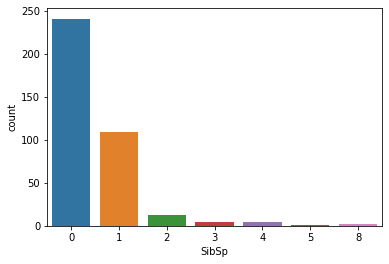

In [ ]:
# countplot of the column SIBSP 
sns.countplot(df2['SibSp'])

### ii) Bivariate Analysis

In [ ]:
# the correlations between the variables
corr2 = df2.corr()
corr2

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.526853,0.030888,0.047056,-0.573748
Age,-0.526853,1.000000,-0.092397,-0.066921,0.342577
SibSp,0.030888,-0.092397,1.000000,0.294969,0.152447
Parch,0.047056,-0.066921,0.294969,1.000000,0.213941
Fare,-0.573748,0.342577,0.152447,0.213941,1.000000


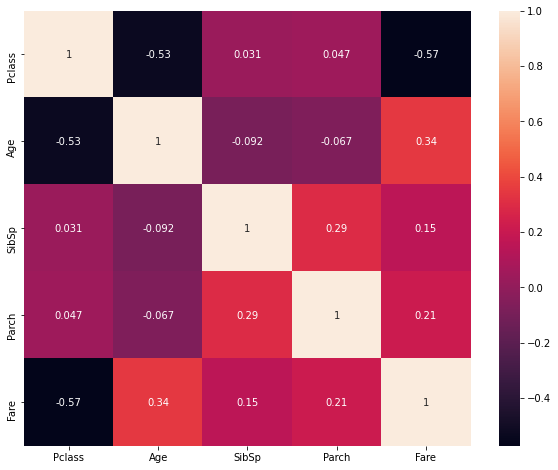

In [ ]:
# visualizing the correlation heatmap 
plt.figure(figsize=(10,8))
sns.heatmap(corr2, annot = True)
plt.show()

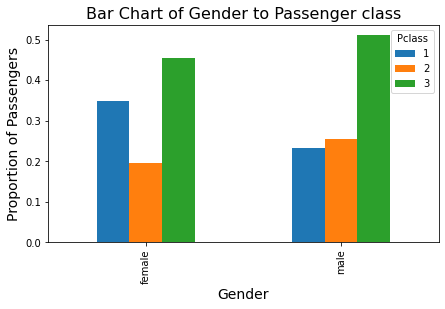

In [ ]:
# Comparison of Gender and survival 

table=pd.crosstab(df2['Sex'],df2['Pclass'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',figsize = (7,4), stacked=False)
plt.title('Bar Chart of Gender to Passenger class', fontsize = 16)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Proportion of Passengers', fontsize = 14)
plt.show()

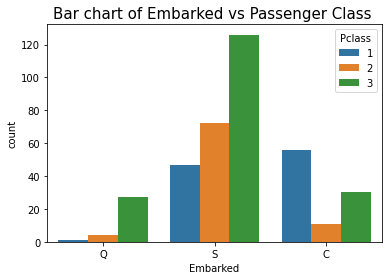

In [ ]:
# countplot of embarked vs survived comparison
#
sns.countplot(x = 'Embarked', hue = 'Pclass', data = df2)
plt.title("Bar chart of Embarked vs Passenger Class ", fontsize = 15)
plt.show()

In [ ]:
# frequency table of passengers class vs SIBSP
pd.crosstab(index= df2['SibSp'],columns=df2["Pclass"],margins=True)


Pclass,1,2,3,All
SibSp,,,,
0,58,57,126,241
1,42,26,41,109
2,3,4,6,13
3,1,0,3,4
4,0,0,4,4
5,0,0,1,1
8,0,0,2,2
All,104,87,183,374


# Feature Engineering

In [ ]:
# preview of the train dataset 
df1.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [ ]:
# Encode categorical data in the train dataset
#label encode
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Sex'] = le.fit_transform(df1['Sex'])

#One hot encode Embarked column using get dummies
df1= pd.get_dummies(df1)

In [ ]:
# Encode categorical data in the test dataset
#label encode
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['Sex'] = le.fit_transform(df2['Sex'])

#One hot encode Embarked column using get dummies
df2 = pd.get_dummies(df2)

In [ ]:
# preview of the encoded test dataset
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1


# 6. Implementing the Solution 


## a) First Model 60 - 40 sets

In [ ]:
# Splitting to features and labels 
X = df1.drop('Survived',axis=1)
y = df1['Survived']

# splitting the data into train and test and settin the test size to 40%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4 , random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# importing the libraries and fitting the classifier 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Predicting the score  
y_pred1 = classifier.predict(X_test)
y_pred1

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0])

In [ ]:
# getting the accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)

0.7741935483870968

In [ ]:
# Getting the classification report and confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))


[[75 12]
 [23 45]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        87
           1       0.79      0.66      0.72        68

    accuracy                           0.77       155
   macro avg       0.78      0.76      0.77       155
weighted avg       0.78      0.77      0.77       155



The value of n-neighbors (k) is chosen to be 5 and the model achieved an accuracy of 78%. 

## b) Second model 70 - 30 sets

In [ ]:
# Splitting to features and labels 
X = df1.drop('Survived',axis=1)
y = df1['Survived']

# splitting the data into train and test and settin the test size to 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# importing the libraries and fitting the classifier 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Predicting the score 
y_pred2 = classifier.predict(X_test)

# Getting the accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)

0.7887931034482759

In [ ]:
# Getting the classification report and confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[118  15]
 [ 34  65]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       133
           1       0.81      0.66      0.73        99

    accuracy                           0.79       232
   macro avg       0.79      0.77      0.78       232
weighted avg       0.79      0.79      0.78       232



Spliiting the data into train and test and using 70% of the test data with the same value of k the second model achieved a slightly higher accuracy of 79% than the first model.

## c) Third Model 80 - 20 sets 

In [ ]:
# Splitting to features and labels 
X = df1.drop('Survived',axis=1)
y = df1['Survived']

# splitting the data into train and test and settin the test size to 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# importing the libraries and fitting the classifier 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Predicting the score 
y_pred3 = classifier.predict(X_test)

# Getting the accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred3)

0.8064516129032258

In [ ]:
# Getting the classification report and confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))


[[162  18]
 [ 42  88]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       180
           1       0.83      0.68      0.75       130

    accuracy                           0.81       310
   macro avg       0.81      0.79      0.79       310
weighted avg       0.81      0.81      0.80       310



The third model had the highest accuracy score of 80%. In this model the test size was set to 20% and the k value was the same as the previous models set at 5. 

Therefore the 80-20 sets model performed the best.

The perecentage of total relevant results correctly classified by the algorthims also known as recall has increased as the test size is decreases.

# Optimization of the Best model 

The models above used the a default metric (minkwoski). Inorder to optimize the the third model which performed the best we will tune the parameters and change the distnace metric to euclidean and manhattan and see the performance of the new model . 

In [ ]:
# Splitting to features and labels 
X = df1.drop('Survived',axis=1)
y = df1['Survived']

# splitting the data into train and test and settin the test size to 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# importing the libraries and fitting the classifier 
from sklearn.neighbors import KNeighborsClassifier
classifier_opt = KNeighborsClassifier(n_neighbors = 9, p =2, leaf_size = 10, metric = 'manhattan')
classifier_opt.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
# Predicting the score 
y_pred_opt = classifier_opt.predict(X_test)

# Getting the accuracy score 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_opt)

0.8129032258064516

The ditance metrics euclidean and cosine achived the same accuracy models as the non optimized model. 

However tuning the parameterssetting k to 9, p = 2, leaf size = 10 and using the manhattan distance metric the models'accuracy performance increased slighty to 81%. 

We can therefore confidently conclude that changing the distance metric optimized the model. 

# Predicting with the test dataset 

In [ ]:
# predicting the test dataset using the optimized model above  
y_pred_opt = classifier_opt.predict(df2)
y_pred_opt

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [ ]:
#predictions as a df appended to set
col_name = ['predicted_survival']
preds_test = pd.DataFrame(y_pred_opt, columns=col_name)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


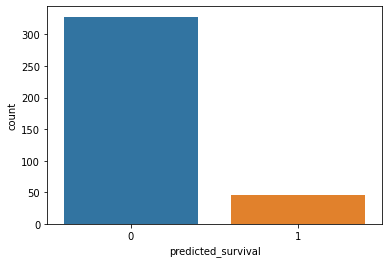

In [ ]:
# visualizing the prediction 
sns.countplot(preds_test['predicted_survival'])

The optimzed model predicted that most passengers in the test dataset did not survive. 

# Challenge the solution 

The models can be further challeged by performing reduction techniques such as PCA to the features and thereafter creating the model and noting down the performance of the model.  

# 8. Follow Up Questions 

a) Did we have the right question 

The question for analysis was appropriate. Recall the objective was to create models that predict if a passnger survived or not and finally optimize the best model.

b) Did we have the right data 

Yes the data was apropriate for analysis 

c) Do we need another data to answer the question 

The variables provided were sufficient but not entirely. if we could have more variables distinguishing the passengers more, i believe we could get more insights from the data. 